In [49]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

## Importando e tratando os dados

In [35]:
df = pd.read_csv('resultados.csv')
df.head()

,extractor,key_points,feature_extract_time,matching,matches,feature_matching_time,rmse_homography,images,error
0,brisk,"[29259, 37205]","[0.8927, 0.7508]",knn,109,8.9773,364.42,"['images/reduce/casa2.png', 'images/reduce/cas...",False
1,brisk,"[29259, 37205]","[0.809, 0.9934]",bf,7334,21.0680,1153.59,"['images/reduce/casa2.png', 'images/reduce/cas...",True
2,orb,"[500, 500]","[0.0695, 0.0671]",knn,5,0.0029,NaN,"['images/reduce/casa2.png', 'images/reduce/cas...",True
3,orb,"[500, 500]","[0.0726, 0.0557]",bf,159,0.0118,663.51,"['images/reduce/casa2.png', 'images/reduce/cas...",True
4,sift,"[5972, 9541]","[1.1843, 0.7686]",knn,89,0.8393,472.53,"['images/reduce/casa2.png', 'images/reduce/cas...",False


In [32]:
# Veja que todas as colunas que são listas, estão sendo lidas como a representação em string de uma lista
df['key_points'][1]

'[29259, 37205]'

In [36]:
# Portanto, vamos transformá-los em listas de verdade
## key_points
df['key_points'] = df['key_points'].map(ast.literal_eval)

## feature_extract_time
df['feature_extract_time'] = df['feature_extract_time'].map(ast.literal_eval)

## images
df['images'] = df['images'].map(ast.literal_eval)



[29259, 37205]

## Analisando os dados

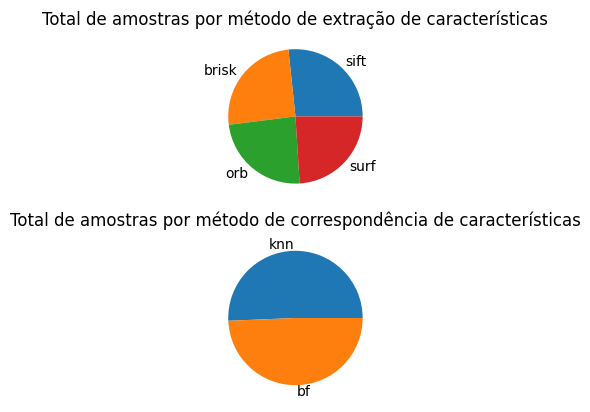

In [47]:
num_extractor = df['extractor'][df['error']== False].value_counts()
num_matching = df['matching'][df['error']== False].value_counts()

plt.subplot(2, 1, 1)
plt.pie(num_extractor.values, labels=num_extractor.index)
plt.title('Total de amostras por método de extração de características')

plt.subplot(2, 1, 2)
plt.pie(num_matching.values, labels=num_matching.index)
plt.title('Total de amostras por método de correspondência de características')

plt.show()
